# Introdução

Este capítulo pretende introduzir o leitor à programação em Mathematica. Vamos assumir que o leitor está vagamente familiarizado com os conceitos de programação.

O Mathematica é extremamente poderoso por causa do seu sistema de programação simbólica, que vamos explorar mais tarde. Para além disso, o Mathematica tem, no momento em que este parágrafo foi escrito, [quase 6000 funções pré-definidas](https://reference.wolfram.com/language/guide/AlphabeticalListing).

No entanto, vamos começar por introduzir o Mathematica como uma linguagem de programação "clássica".

## Objetivos

Os objetivos deste capítulo são

 - apresentar a sintaxe básica para chamar funções no Mathematica;
 - mostrar como encadear várias instruções consecutivas;
 - mostrar que tudo no Mathematica são funções;
 - usar as funções `If`, `For` e `While` para execução condicional e/ou repetida de código;
 - usar conectores lógicos e funções lógicas para escrever condições;
 - aprender a usar `Module` para impedir que a sessão fique cheia de variáveis inúteis;
 - aprender a definir as tuas próprias funções;
 - sugerir boas práticas para escrever código legível.

## Uma calculadora potente

O Mathematica pode ser usado como uma calculadora muito potente. As quatro operações básicas são acessíveis através dos quatro símbolos usuais das linguagens de programação:

In [1]:
1 + 2

3

In [2]:
3 - 4

-1

In [3]:
5 * 6

30

In [4]:
7 / 8

7
-
8

O Mathematica é um software com muitas funcionalidades simbólicas e, por esse motivo, o Mathematica dá-nos respostas exatas sempre que consegue. Por isso é que `7 / 8` deu $\frac{7}{8}$. Se quisermos obrigar o Mathematica a dar-nos um número, podemos usar a função `N`:

In [5]:
N[7 / 8]

0.875

Por ser uma ferramenta de cálculo simbólico, o Mathematica não tem limitações muito grandes no quão grandes ou pequenos os números podem ficar. Por exemplo, podemos usar `N` para pedir o resultado de uma operação com tantas casas decimais quantas quisermos:

In [18]:
N[1/7]

0.142857

In [19]:
N[1/7, 50]

0.14285714285714285714285714285714285714285714285714

In [20]:
N[Pi, 300]

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803\
 
>   482534211706798214808651328230664709384460955058223172535940812848111745028410270193\
 
>   852110555964462294895493038196442881097566593344612847564823378678316527120190914564\
 
>   856692346034861045432664821339360726024914127

É importante notar que, para o Mathematica, todas as operações são funções. Assim, apesar de ser possível dividir dois números com `1/7`, também é possível fazê-lo com

In [21]:
Divide[1, 7]

1
-
7

In [22]:
N[Divide[1, 7]]

0.142857

Há muitas funções numéricas pré-definidas no Mathematica, por exemplo `Plus`, `Minus`, `Times`, `Divide`, `Power`, `Sqrt`, `Mod`, `Quotient`, `QuotientRemainder`, `Divisible`, ... Cabe ao utilizador usar o comando de ajuda `?F` para descobrir o que é que estas funções fazem.

```{admonition} TL;DR
O mais importante desta secção é
 - a sintaxe para chamar funções, que usa parêntesis retos;
 - o facto de tudo ser uma função no Mathematica, até operações que têm símbolos próprios.
```

## Execução condicional

No Matemática, podemos executar código condicionalmente com a função `If[condition, ifTrue]`:

In [30]:
If[5 > 0, Print["HEY!"]]

HEY!


In [31]:
If[5 > 10, Print["HEY!"]]

Podemos pedir ao Mathematica que nos mostre a ajuda relativa a esta função se pusermos um `?` antes do nome da função:

If[condition, t, f] gives t if condition
 
>      evaluates to True, and f if it evaluates to False. If[condition, t, f, u]

 
>        gives u if condition evaluates to neither True nor False. 


Attributes[If]={HoldRest, Protected}
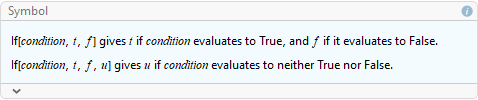

In [32]:
?If

A primeira linha diz-nos que podemos passar 3 argumentos à função `If`, em vez de só dois, para executarmos código caso a condição seja falsa:

In [33]:
If[5 > 10, Print["HEY!"], Print["It was false..."]]

It was false...


Claro que o segundo e terceiro argumentos da função `If` podem ser mais do que uma simples expressão. Em Mathematica, usa-se `;` para separar expressões consecutivas:

In [40]:
If[5 > 0,
    var = 3; other = 3^var; Print[other],
    var = 4; other = 4^var; Print[other]
]

27


In [35]:
If[5 > 10,
    var = 3; other = 3^var; Print[other],
    var = 4; other = 4^var; Print[other]
]

256


Porque no Mathematica tudo são funções, é importante notar que a sintaxe `;` é só um atalho para a função `CompoundExpression`, cujos argumentos são as expressões consecutivas:

expr  ; expr  ; … evaluates the expr  in turn, giving the last one as the result. 
    1       2                       i


Attributes[CompoundExpression]={HoldAll, Protected, ReadProtected}
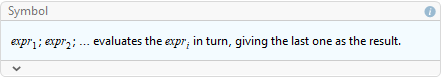

In [38]:
?CompoundExpression

Neste caso, vemos que a ajuda do Mathematica até usa a sintaxe `;` em vez da função explícita. Para efeitos de demonstração, podemos usar a função propriamente dita:

In [54]:
If[5 > 0,
    CompoundExpression[var = 3, other = 3^var, Print[other]],
    CompoundExpression[var = 4, other = 4^var, Print[other]]
]

27


Naturalmente, há vários conectores lógicos que podem ser usados para criar condições mais complexas, tais como a disjunção (`&&` ou função `And`) e a conjunção (`||` ou função `Or`). Também podemos usar `==` (`Equal`) para testar igualdade e `!=` (`Unequal`) para testar desigualdade. Finalmente, para negar um valor lógico podemos usar um `!` antes do valor lógico, ou usar a função `Not`:

In [55]:
3 == 3

True

In [56]:
3 != 3

False

In [58]:
True && False

False

In [60]:
True || False

True

In [61]:
!True

False

```{admonition} TL;DR
O mais importante desta secção é
 - que execução condicional se faz com `If[condition, ifTrue, ifFalse]`;
 - instruções consecutivas são separadas por `;`.
```

## Ciclos

De modo semelhante, o Mathematica tem funções `For` e `While` para executar estes dois tipos de ciclos.

### Ciclo `For`

O ciclo `For` é tipicamente usado para algoritmos com algum tipo de interpretação linear, ou para os quais sabemos exatamente quantas iterações queremos fazer.

Compreender a ajuda do Mathematica é uma boa capacidade para se ter, portanto vamos interpretar esta mensagem de ajuda:

For[start, test, incr, body] executes start
 
>    , then repeatedly evaluates body and incr until test fails to give True. 


Attributes[For]={HoldAll, Protected}
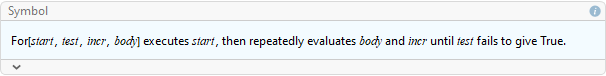

In [41]:
?For

Da mensagem em cima percebemos que o argumento `test` deve ser uma condição que é usada para verificar quando é que devemos parar o ciclo e também percebemos que o primeiro argumento `start` só é executado uma vez, no início, para inicializar variáveis. Tipicamente, o primeiro argumento é usado para inicializar as variáveis auxiliares do ciclo.

O último argumento é o "corpo" do ciclo (`body`), que há de ser o código que queremos executar repetidamente. O argumento `incr` é a expressão que é usada para indicar que está a ser feito progresso. Por exemplo, se quisermos imprimir os números inteiros de $1$ a $5$ inclusive, teríamos o seguinte:

 - `start` seria `i = 1` para inicializar a variável auxiliar que vai "contar" até $5$;
 - `test` seria `i <= 5` porque queremos imprimir os números enquanto ainda estivermos a contar números menores ou iguais a $5$;
 - `incr` seria `i = i + 1` porque, depois de imprimirmos um número, queremos "contar" o próximo número;
 - `body` seria `Print[i]` porque essa é a expressão principal que queremos executar em cada iteração.

Tudo junto, teria este aspeto:

In [83]:
For[i = 1, i <= 5, i = i + 1,
    Print[i]
]

1
2
3
4
5


Note-se que o terceiro argumento da função `For`, que é a expressão que deve incrementar a variável do ciclo, usa geralmente uma notação abreviada para alterar o valor da variável.

Essa sintaxe pretende abreviar o padrão `var = var f value` para `var f= value`.

Assim, incrementar uma variável uma unidade deixa de ser `var = var + 1` e passa a ser `var += 1`:

In [84]:
var = 3;
var += 1;
Print[var];

4


Claro que `f` não tem de ser a adição e o valor a ser usado não precisa de ser `1`:

In [87]:
var = 3;
var += 2;
Print[var];

5


In [90]:
var -= 5;
Print[var];

0


Os casos `var += 1` e `var -= 1` têm ainda dois casos especiais, nomeadamente `++var`, `var++`, `--var` e `var--`. A diferença reside na ordem em que as coisas acontecem.

`var++` primeiro devolve o valor de `var` e depois incrementa a variável, ao passo que `++var` primeiro incrementa o valor da variável e só depois é que o devolve:

In [75]:
var = 0;
Print[var];
Print[var++];
Print[var];

0
0
1


In [79]:
var = 0;
Print[var];
Print[++var];
Print[var];

0
1
1


`var--` e `--var` funcionam de modo semelhante.

```{admonition} TL;DR
O mais importante desta subsecção é
 - a sintaxe `variable f= value` para alterar o valor de `variable` de forma mais sucinta;
 - a função `For[initialisation, stoppingTest, increment, loopBody]` para execução repetida de um conjunto de instruções.
```

### Ciclo `While`

De modo semelhante, existe uma função `While` que permite a execução repetida de um conjunto de instruções até que um certo teste seja falso:

While[test, body] evaluates test, then body
 
>     , repetitively, until test first fails to give True. 


Attributes[While]={HoldAll, Protected}
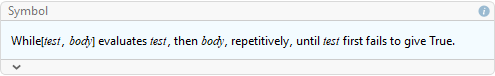

In [92]:
?While

In [93]:
i = 1;
While[i <= 5,
    Print[i];
    i = i + 1;
]

1
2
3
4
5


O exemplo em cima é equivalente à utilização do ciclo `For` da subsecção anterior e é, em particular, um exemplo relativamente mau de uma utilização útil do ciclo `While`. O acto de "contar" de $1$ até $5$ é algo linear, que acontece de forma regular, e é por isso um excelente algoritmo para ser implementado com um ciclo `For`.

Em geral, o ciclo `While` usa-se em algoritmos em que é mais difícil prever, *a priori*, o número de iterações que vão ser necessárias para completar o algoritmo. Por exemplo, quando calculamos os valores sucessivos que um número toma na sequência de Collatz:

:::{tip}
A "Conjetura de Collatz" diz que qualquer número inteiro positivo $n$ eventualmente chega a $1$, se seguirmos a sequência $n_0 = n$,

$$
n_{i + 1} = \begin{cases}
    \frac{n_i}{2}, \text{ if $2$ divides $n$ } \\
    3n_i + 1, \text{ otherwise }
\end{cases} ~ .
$$
:::

In [31]:
n = 10;
While[n > 1,
    If[Divisible[n, 2],
        n = n/2,
        n = 3n + 1
    ];
    Print[n]
]

5
16
8
4
2
1


```{admonition} TL;DR
O mais importante desta subsecção é
 - a sintaxe da função `While` que permite a execução repetida de um conjunto de instruções.
```

## A praga das variáveis temporárias

Em Mathematica, todas as variáveis que criamos são criadas de forma global. Isto significa que todas as pequenas variáveis que usarmos para cálculos auxiliares ou resultados temporários ficam disponíveis na nossa sessão. Isto pode parecer bom, mas rapidamente a quantidade enorme de variáveis que estão disponíveis vai interferir com o nosso código. Isto pode acontecer por uma de variadíssimas razões, por exemplo porque estamos a tentar fazer cálculos simbólicos mas estamos a usar variáveis que estão definidas ou uma variável é usada inadvertidamente num sítio que não deve, e portanto o seu valor está diferente do que deveria ser.

Para evitar isto, o Mathematica possui a função `Module`. A função `Module` recebe dois argumentos:

Module[{x, y, …}, expr] specifies that occurrences of the symbols x
 
>    , y, … in expr should be treated as local. Module[{x = x , …}, expr]
                                                             0
 
>        defines initial values for x, …. 


Attributes[Module]={HoldAll, Protected}
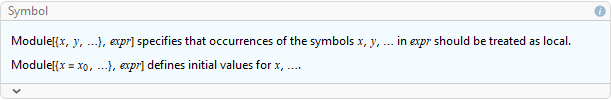

In [101]:
?Module

Podemos ver que o primeiro argumento da função é uma lista de nomes de variáveis (possivelmente com valores iniciais) e podemos ver que o segundo argumento será o código que queremos escrever.

Por exemplo, em cima escrevemos um ciclo `For` que usava a variável auxiliar `i`, que ainda existe e tem um valor:

In [103]:
i

6

Mas esta variável é completamente inútil, na medida em que o seu único propósito era como variável auxiliar no ciclo. Podemos apagá-la com a função `Clear`:

In [104]:
Clear[i]

E agora podemos escrever o mesmo ciclo, mas dentro da função `Module`, para que a variável auxiliar não se torne global:

In [105]:
Module[{i},
    For[i = 1, i <= 3, i++,
        Print[i]
    ]
]

1
2
3


Agora podemos ver que a variável `i` não tem qualquer valor:

In [109]:
i

i

Numa linguagem de programação típica isto seria um erro qualquer, por exemplo um `Name Error` em Python, porque `i` não diz respeito a nenhuma variável definida, mas em Mathematica obtemos o nome da variável como resposta, porque Mathematica é um software de cálculo simbólico.

:::{admonition} TL;DR
O mais importante desta subsecção é
 - o facto de que é má ideia deixar todas as variáveis tornarem-se globais;
 - podemos manter variáveis como locais com a função `Module`.
:::

## Definição de funções

Se houver algum pedaço de código que usemos várias vezes, pode ser útil defini-lo como uma função para que possamos usar esse código repetidamente. Por exemplo, podemos modificar o exemplo em cima e criar uma função que, dado um número natural, devolve o número de passos necessários dar na sequência de Collatz para chegar ao $1$.

Para definir uma função, usamos uma atribuição com `=` e, do lado direito, usamos a função `Function`:

body & or Function[body] is a pure (or "anonymous") function. The formal parameters are\\
                         
                        >   # (or #1), #2, etc. 

 
>       Function[x, body] is a pure function with a single formal parameter x
 
>      . Function[{x , x , …}, body]
                    1   2
 
>        is a pure function with a list of formal parameters. 

 
>        Function[params, body, attrs]
 
>         is a pure function that is treated as having attributes attrs
 
>          for purposes of evaluation.


Attributes[Function]={HoldAll, Protected}
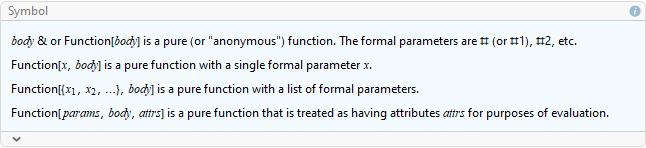

In [1]:
?Function

As linhas que nos interessam mais aqui são a segunda e a terceira, que mostram como definir funções de um ou vários argumentos. Por exemplo, uma simples função para incrementar uma variável seria

In [2]:
Function[x, x+1]

Function[x, x + 1]

Mas se não dermos nome à função, será difícil usá-la. Nesse sentido, podemos escrever algo como

In [33]:
AddOne = Function[x, x + 1]

Function[x, x + 1]

e de seguida usar essa função:

In [34]:
AddOne[1.5]

2.5

In [36]:
AddOne[Pi]

1 + Pi

Se quisermos escrever uma função que recebe dois argumentos, então escrevemos

In [ ]:
Avg = Function[{a, b}, (a + b)/2]

e agora podemos chamar a função `Avg` com dois argumentos:

In [9]:
Avg[1, 2]

3
-
2

Se o corpo da função for mais complexo, então é melhor usar a função `Module` para evitar que as nossas variáveis temporárias sejam definidas globalmente. Por exemplo, podemos pegar no exemplo em cima e escrever uma função que calcula o comprimento da sequência de Collatz para um dado número natural:

Function[n, Module[{length = 0, iter = n}, 
 
                                                   iter
>    While[iter > 1, If[Divisible[iter, 2], iter = ----, iter = 3 iter + 1]; 
                                                    2
 
>       length++; ]; length]]
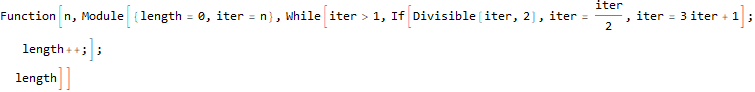

In [27]:
CollatzLength = Function[n, Module[{length = 0, iter = n},
    While[iter > 1,
        If[Divisible[iter, 2],
            iter = iter/2,
            iter = 3*iter + 1
        ];
        length++;
    ];
    length
]]

In [28]:
CollatzLength[1]

0

In [29]:
CollatzLength[2]

1

In [30]:
CollatzLength[5]

5

No código em cima vemos que criámos uma variável `iter`, em vez de calcularmos a sequência diretamente sobre `n`. Fizemos isto porque não se pode alterar o valor do argumento de uma função. Ou seja, isto é ilegal:

In [5]:
ChangeArg = Function[n, n = 3];
ChangeArg[6]

Cannot assign to raw object `1`.: Cannot assign to raw object 6.

3

:::{admonition} TL;DR
O mais importante nesta subsecção é
 - a sintaxe para criar funções.
:::

## Notas sobre estilo

Um ponto muito importante quando se escreve código, e que é muitas vezes descurado, é o de escrever código que seja legível. Código legível é código que é muito mais fácil de depurar quando tem erros e, honestamente, muito melhor de olhar para.

Para se escrever código legível, há que fazer uma boa gestão da indentação do código, dos espaços ` `, dos nomes das variáveis, e dos comentários. Isto são coisas altamente subjetivas, mas há padrões que são relativamente bem aceites.

### Espaços em branco

A título de exemplo, é comum que a seguir a sinais de pontuação venha um espaço, tal como na linguagem escrita.

Uma pessoa (que saiba o que faz) escreverá "*João, podes vir aqui? Obrigado!*" e não "*João,podes vir aqui?Obrigado*".

Isto é relevante para `,` usadas para separar argumentos e para `;` usados para separar instruções. Compare-se

In [112]:
If[5 > 0, var = 3^100; Print[var], Print[0]]

515377520732011331036461129765621272702107522001


com

In [113]:
If[5 > 0,var = 3^100;Print[var],Print[0]]

515377520732011331036461129765621272702107522001


Também é comum usarem-se espaços à volta de algumas operações binárias e atribuições, como é o caso de `=` e `>` no exemplo em cima.

### Uma instrução por linha

A não ser que as instruções sejam extremamente triviais (por exemplo atribuições para inicializar variáveis) é recomendado que cada instrução esteja na sua própria linha, em vez de todas seguidas.

:::{warning}
Mesmo que se mude de linha é necessário usar `;` para separar as instruções.
:::

### Usar mudanças de linha e indentação para gerir contexto

Mudar de linha e indentar o código para ajudar a agrupar instruções como pertencendo a um mesmo contexto é um mecanismo muito útil. Por exemplo, compare-se o exemplo do ciclo `While` em cima com

In [114]:
n = 10;
While[n > 1, If[Mod[n, 2] == 0, n = n/2, n = 3n + 1]; Print[n]]

5
16
8
4
2
1


Alguns dirão que é legível. Ainda é relativamente legível, mas estamos a falar de um ciclo trivial com uma única execução condicional. E o bom de termos algumas regras que tentamos seguir, é que podemos segui-las automaticamente sem ter de pensar muito. Se adotarmos uma certa convenção, depois não temos de decidir o que fazer quando o código não for curto e simples.

Pessoalmente, gosto de mudar de linha e indentar o código sempre que um argumento de uma função representa um conjunto de instruções. Por exemplo, o segundo argumento de `Module` é um conjunto de instruções, e por isso eu mudo de linha e indento o código quando escrevo o segundo argumento do `Module`. Faço o mesmo no quarto argumento da função `For`, no segundo da função `While` e nos segundo e terceiro argumentos da função `If`.

Quando fecho o parêntesis reto da função, alinho o `]` com o início do nome da função. Existem outras alternativas, por exemplo pôr o `]` logo a seguir à última expressão. Compare-se

In [116]:
If[5 > 0,
    Print[5],
    Print[0]
]

5


com

In [117]:
If[5 > 0,
    Print[5],
    Print[0]]

5


### Nomes de variáveis e funções

Antes de mais, é importante referir que o símbolo `_` (underscore) não pode ser usado em nomes de variáveis, por ter um significado quando usado com as funcionalidades simbólicas do Mathematica.

Internamente, o Mathematica usa a convenção `CamelCase` para os nomes das funções e a convenção `pascalCase` para os nomes das variáveis. Estas convenções são bastante adequadas e aconselho-as.

Outro assunto bastante descurado é o de atribuir nomes relevantes às variáveis e às funções... Um nome de uma variável/função deve ser descritivo e claro. Nomes muito curtos (e nomes com uma letra, em particular) não costumam fazer sentido, exceto em casos notórios. Deixo à consideração do leitor a sugestão de que os nomes das variáveis/funções devem ser tão mais compridos quanto menos vezes uma variável/função é usada.

Imaginem ter dezenas ou centenas de linhas de código numa aplicação qualquer. Notem que a instrução `users = newUsers` é _muito_ mais expressiva que as alternativas `u += n` ou `u += nu`, por exemplo.

A utilização de nomes expressivos é particularmente importante quando damos nomes aos argumentos de uma função.

:::{admonition} TL;DR
O ponto mais importante desta secção é que escrever com um bom estilo pode parecer parvo ou desnecessário, mas faz *toda* a diferença. Por exemplo, quando revisitamos código que escrevemos há algum tempo ou quando precisamos que outra pessoa nos ajude a encontrar um erro no nosso código (ou quando *nós* precisamos de encontrar um erro no *nosso* código).
:::

## Exercícios

Seguem agora alguns exercícios para testar os conhecimentos adquiridos neste pequeno capítulo. Os exercícios são importantes! Tenta resolvê-los e, quando conseguires, compara as tuas soluções com as minhas sugestões de solução. Compará-los pode ser muito útil..! E as soluções podem conter dicas importantes ou ensinamentos novos!

**Exercício 1**:

Escreve código para implementar o fatorial de um número inteiro não-negativo. Podes testar o teu código comparando os resultados com a função `Factorial` pré-definida.

**Exercício 2**:

Pega no código do exercício em cima e põe-no numa função.

**Exercício 3**:

Escreve uma função que recebe um inteiro positivo e faz uma de $4$ coisas (a primeira que se verificar):
 - imprime `"FizzBuzz"` se o argumento for divisível por $3$ e $5$;
 - imprime `"Fizz"` se o argumento for divisível por $3$;
 - imprime `"Buzz"` se o argumento for divisível por $5$;
 - imprime o argumento.

**Exercício 4**:

Implementa uma função que recebe dois argumentos e devolve o maior dos dois e uma função que devolve o menor dos dois.

**Exercício 5**:

Implementa uma função que recebe dois argumentos e devolve o maior divisor comum entre os dois. Escreve uma solução imperativa (com ciclos) e uma solução recursiva.

**Exercício 6a**:

Garante que o código que escreveste nos exercícios anteriores só usa variáveis locais (através da utilização da função `Module`).

**Exercício 6b**:

Garante que o código que escreveste nos exercícios anteriores usa convencões estilísticas razoáveis.

## Soluções

:::{tip}
Aprendes muito mais se **tentares** resolver os exercícios sozinhos. Avança só depois de os resolveres ou depois de gastares muito tempo a tentar. Tentar e falhar é *muito* melhor que não tentar.
:::

**Exercício 1**:

Para calcular o fatorial de $n$ precisamos de multiplicar os números todos de $1$ até $n$, por isso parece razoável usar um ciclo `For` para "contar" de $1$ a $n$ e ir multiplicando pelo caminho:

In [16]:
Module[{n, fact, i},
    n = 10;
    fact = 1;
    For[i = 1, i <= n, i++,
        fact *= i;
    ];
    fact
]

3628800

Um truque engraçado que pode ser feito, mas que não é nada aconselhado, é encurtar o ciclo ao incluir a multiplicação `fact *= i` no terceiro argumento do `For`, ao usar `i++` para incrementar `i`:

In [19]:
Module[{n, fact, i},
    n = 10;
    fact = 1;
    For[i = 1, i <= n, fact *= i++];
    fact
]

3628800

A implementação deve estar correta, já que

In [20]:
Factorial[10]

3628800

**Exercício 2**:

Pôr tudo numa função é bastante simples. Só temos de pôr o código dentro do segundo argumento da função `Function` e garantir que não tentamos inicializar a variável `n` dentro da função:

In [22]:
Fact = Function[n, Module[{fact, i},
    fact = 1;
    For[i = 1, i <= n, fact *= i++];
    fact
]]

Function[n, Module[{fact, i}, fact = 1; For[i = 1, i <= n, fact *= i++]; fact]]

In [23]:
Fact[10]

3628800

In [24]:
Fact[15]

1307674368000

**Exercício 3**:

Este exercício não é difícil, só é preciso ter cuidado a utilizar os vários `If`, encadeá-los na ordem certa e saber que podemos usar a função `Divisible` para testar divisibilidade:

In [37]:
FizzBuzz = Function[n,
    If[Divisible[n, 15],
        "FizzBuzz",
        If[Divisible[n, 3],
            "Fizz",
            If[Divisible[n, 5],
                "Buzz",
                n
            ]
        ]
    ]
]

Function[n, If[Divisible[n, 15], FizzBuzz, 
 
>    If[Divisible[n, 3], Fizz, If[Divisible[n, 5], Buzz, n]]]]

In [38]:
FizzBuzz[1]

1

In [39]:
FizzBuzz[3]

Fizz

In [40]:
FizzBuzz[10]

Buzz

In [41]:
FizzBuzz[15]

FizzBuzz

Apesar de funcionar, podemos ver que esta função é bastante deselegante, por ter tantos `If` uns dentro dos outros. Outra alternativa seria usar a função `Which`, que nos permite escolher de entre uma série de conjuntos de instruções, consoante o valor de vários testes diferentes:

Which[test , value , test , value , …]
          1       1      2       2
 
>    evaluates each of the test  in turn, returning the value of the value
                               i                                          i
 
>      corresponding to the first one that yields True. 


Attributes[Which]={HoldAll, Protected}
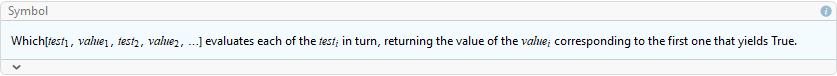

In [1]:
?Which

Nesse sentido, poderíamos escrever a função `FizzBuzz` assim:

In [2]:
FizzBuzzWhich = Function[n,
    Which[
        Divisible[n, 15], "FizzBuzz",
        Divisible[n, 3], "Fizz",
        Divisible[n, 5], "Buzz",
        True, n
    ]
]

Function[n, Which[Divisible[n, 15], FizzBuzz, Divisible[n, 3], Fizz, Divisible[n, 5], 
 
>    Buzz, True, n]]

In [3]:
FizzBuzzWhich[1]

1

In [4]:
FizzBuzzWhich[3]

Fizz

In [5]:
FizzBuzzWhich[10]

Buzz

In [6]:
FizzBuzzWhich[15]

FizzBuzz

Na função `FizzBuzzWhich`, em cima, usámos `True` como o "teste" da quarta expressão, para que esta expressão fosse avaliada independentemente do valor de `n`. Usar `True` com um `Which` pode ser pensado como um `else` numa outra linguagem de programação, ou como o ramo `default` de um `switch`, se souberem o que isso é (não faz mal se não souberem).

**Exercício 4**:

In [45]:
MaxOf2 = Function[{a, b}, If[a > b, a, b]]

Function[{a, b}, If[a > b, a, b]]

In [46]:
MaxOf2[1, Pi]

Pi

In [47]:
MaxOf2[10, 2Pi]

10

In [48]:
MinOf2 = Function[{a, b}, If[a < b, a, b]]

Function[{a, b}, If[a < b, a, b]]

In [49]:
MinOf2[1, Pi]

1

In [50]:
MinOf2[10, 2Pi]

2 Pi

**Exercício 5**:

Resolver este problema é simples, basta saber qual é o algoritmo mais simples para calcular o maior divisor comum de dois números. Um algoritmo menos bem pensado passa por testar todos os números até ao menor dos dois argumentos e guardar o maior que dividiu os dois números:

In [2]:
GCDLoop = Function[{a, b}, Module[{gcd, i},
    For[i = 1, i <= Min[a, b], i++,
        If[Divisible[a, i] && Divisible[b, i],
            gcd = i
        ];
    ];
    gcd
]]

Function[{a, b}, Module[{gcd, i}, For[i = 1, i <= Min[a, b], i++, 
 
>      If[Divisible[a, i] && Divisible[b, i], gcd = i]; ]; gcd]]

In [35]:
GCDLoop[12, 21]

3

In [36]:
GCDLoop[21, 12]

3

O "nível" a seguir seria um algoritmo mais pensado, com base no facto de que $\gcd(a, b) = \gcd(b, a-b)$. Isto também é fácil de implementar. Temos só de usar um ciclo `While` para ir aplicando a igualdade enquanto não encontrámos o $\gcd$. Só precisamos de ter cuidado para manter a ordem entre `a` e `b` controlada, porque se não tivermos cuidado na nossa implementação os resultados podem ficar errados ao trocar a ordem dos argumentos.

Function[{a, b}, Module[{m = Max[a, b], n = Min[a, b], t}, 
 
>    While[!Divisible[m, n], t = m; m = n; n = t - n; 
 
>       If[n > m, t = m; m = n; n = t; ]; ]; n]]
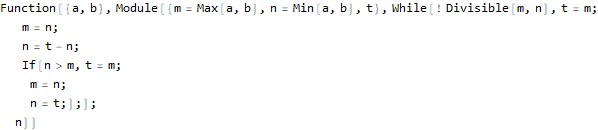

In [17]:
GCDSmart = Function[{a, b}, Module[{m = Max[a, b], n = Min[a, b], t},
    While[!Divisible[m, n],
        t = m;
        m = n;
        n = t - n;
        If[n > m,   (* keep m as the larger of the two *)
            t = m;
            m = n;
            n = t;
        ];
    ];
    n
]]

In [29]:
GCDSmart[12, 21]

3

In [30]:
GCDSmart[21, 12]

3

O código em cima é particularmente deselegante porque temos de usar uma variável temporária, `t`, para ajudar a trocar os valores das variáveis quando necessário. Ainda bem que há uma sintaxe melhor para isso:

In [31]:
a = 0;
b = 1;
{a, b} = {b, a};
a

1

In [24]:
b

0

Assim, podemos reescrever a função em cima como:

Function[{a, b}, Module[{m = Max[a, b], n = Min[a, b]}, 
 
>    While[!Divisible[m, n], {m, n} = {n, m - n}; If[n > m, {m, n} = {n, m}]; ]; n]]
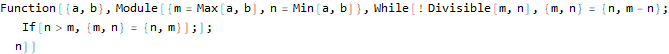

In [27]:
GCDSmartShorter = Function[{a, b}, Module[{m = Max[a, b], n = Min[a, b]},
    While[!Divisible[m, n],
        {m, n} = {n, m - n};
        If[n > m,
            {m, n} = {n, m}
        ];
    ];
    n
]]

In [37]:
GCDSmartShorter[12, 21]

3

In [38]:
GCDSmartShorter[21, 12]

3

Finalmente, há uma outra melhoria que podemos fazer à nossa função. Se $a > 2b$, então $\gcd(a, b) = \gcd(b, a - 2b)$. Se $a > 3b$, então $\gcd(a, b) = \gcd(b, a - 3b)$. E por aí fora. Assim, podemos ainda escrever:

In [39]:
GCDSmartest = Function[{a, b}, Module[{m = a, n = b},
    While[!Divisible[m, n],
        {m, n} = {n, Mod[m, n]};
    ];
    n
]]

Function[{a, b}, Module[{m = a, n = b}, 
 
>    While[!Divisible[m, n], {m, n} = {n, Mod[m, n]}; ]; n]]

In [40]:
GCDSmartest[12, 21]

3

In [41]:
GCDSmartest[21, 12]

3

Todas estas funções podem ser transformadas em soluções recursivas, mas naturalmente é mais fácil converter a mais simples de todas. Numa função recursiva temos de testar o caso mais simples de todos, que sabemos resolver, e se esse caso não se verificar, temos de fazer uma chamada recursiva:

In [42]:
GCDRecursive = Function[{a, b},
    If[Divisible[a, b],
        b,
        GCDRecursive[b, Mod[a, b]]
    ]
]

Function[{a, b}, If[Divisible[a, b], b, GCDRecursive[b, Mod[a, b]]]]

In [43]:
GCDRecursive[12, 21]

3

In [44]:
GCDRecursive[21, 12]

3

**Exercícios 6a e 6b**:

Verifica que não tens variáveis locais que não deviam existir. Garante que a lista de variáveis de cada `Module` contém todas as variáveis que são usadas no corpo de uma função, exceto os argumentos da função. Garante também que não encavalistaste o teu código também em linhas de menos e garante que não te esqueceste de incluir espaços depois de vírgulas e que não te esqueceste de mudar de linha depois de cada `;`.